# Notebook to compare ML model results from JSON summary

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For better visuals
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})

In [4]:
RESULTS_PATH = "../models/comparison_summary.json"

with open(RESULTS_PATH, 'r', encoding='utf-8') as f:
    results = json.load(f)

In [5]:
# Extract data_info and models
data_info = results.get('data_info', {})
models = results.get('models', {})

print("Dataset info:", data_info)
print("Models found:", list(models.keys()))

Dataset info: {'train_samples': 431, 'test_samples': 105, 'class_distribution': {'Négatif': 94, 'Neutre': 39, 'Positif': 298}}
Models found: ['MultinomialNB', 'ComplementNB', 'LogisticRegression', 'RandomForest']


In [6]:
overall_metrics = []
for mname, mdict in models.items():
    overall_metrics.append({
        'model': mname,
        'accuracy': mdict.get('accuracy'),
        'weighted_f1': mdict.get('weighted_f1'),
        'macro_f1': mdict.get('macro_f1')
    })
df_overall = pd.DataFrame(overall_metrics).set_index('model')

print("\nOverall metrics per model:")
print(df_overall)

# Per‑class F1 scores
per_class = []
for mname, mdict in models.items():
    per = mdict.get('per_class_f1', {})
    per_class.append({
        'model': mname,
        'F1_Négatif': per.get('Négatif', None),
        'F1_Neutre': per.get('Neutre', None),
        'F1_Positif': per.get('Positif', None),
    })
df_per_class = pd.DataFrame(per_class).set_index('model')

print("\nPer-class F1 per model:")
print(df_per_class)


Overall metrics per model:
                    accuracy  weighted_f1  macro_f1
model                                              
MultinomialNB       0.723810     0.640333  0.391746
ComplementNB        0.733333     0.703041  0.479797
LogisticRegression  0.771429     0.712882  0.481219
RandomForest        0.761905     0.704350  0.473304

Per-class F1 per model:
                    F1_Négatif  F1_Neutre  F1_Positif
model                                                
MultinomialNB         0.344828        0.0    0.830409
ComplementNB          0.603774        0.0    0.835616
LogisticRegression    0.588235        0.0    0.855422
RandomForest          0.571429        0.0    0.848485


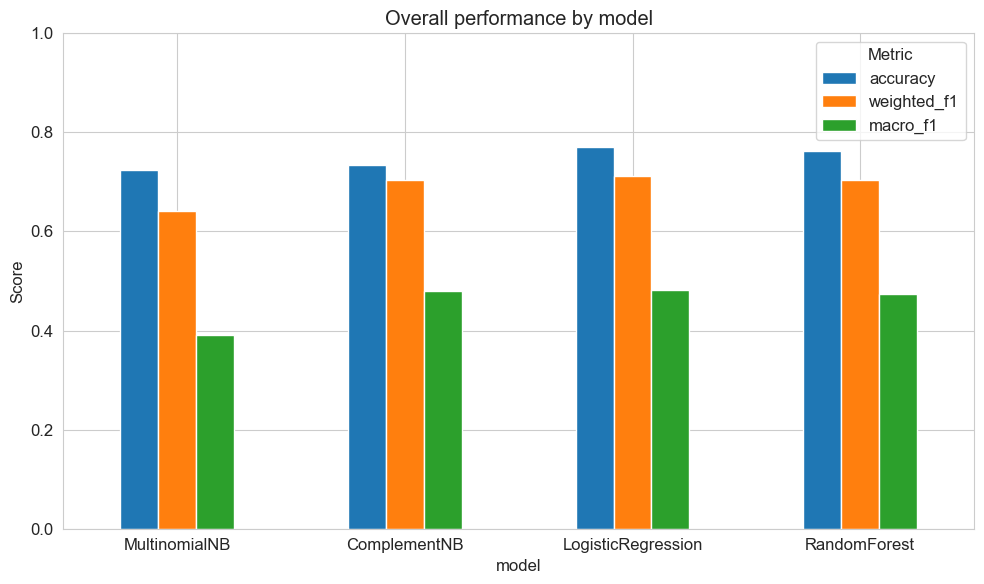

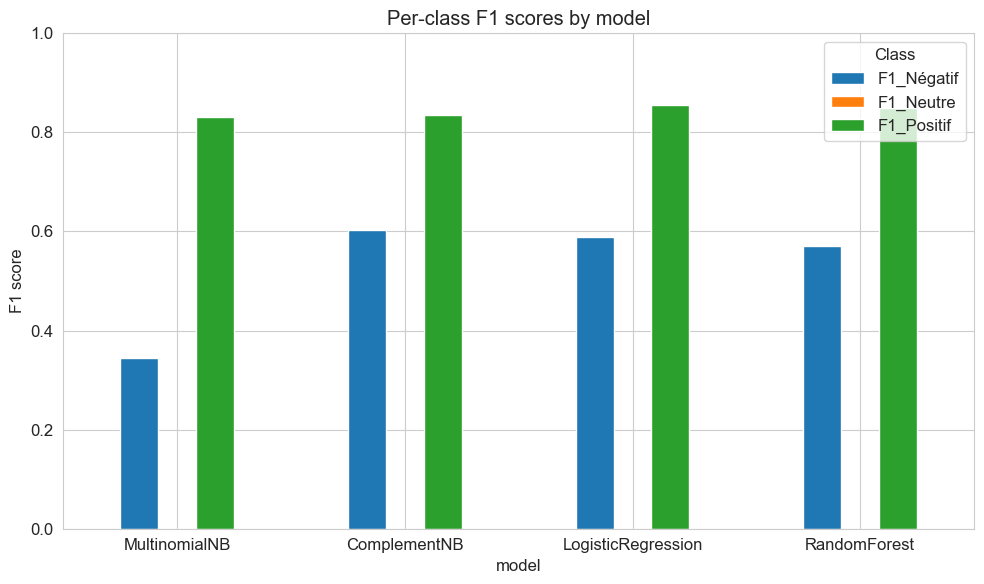

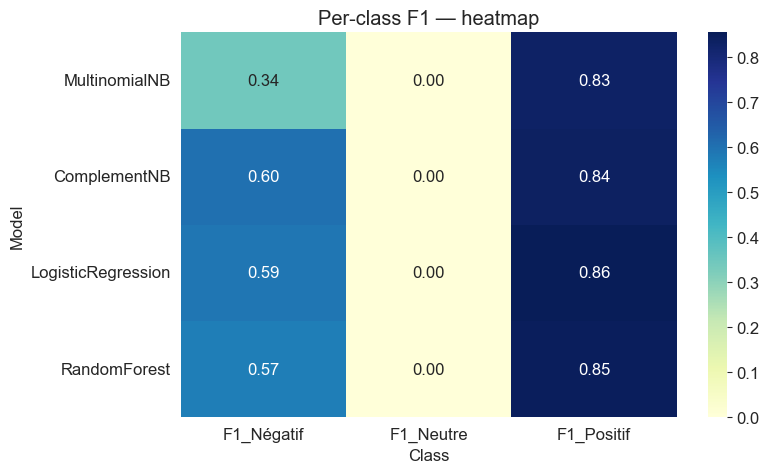


Combined summary (overall + per-class):


,accuracy,weighted_f1,macro_f1,F1_Négatif,F1_Neutre,F1_Positif
model,,,,,,
MultinomialNB,0.723810,0.640333,0.391746,0.344828,0.0,0.830409
ComplementNB,0.733333,0.703041,0.479797,0.603774,0.0,0.835616
LogisticRegression,0.771429,0.712882,0.481219,0.588235,0.0,0.855422
RandomForest,0.761905,0.704350,0.473304,0.571429,0.0,0.848485


In [7]:
# 1. Bar chart – Overall metrics
df_overall.plot(kind='bar', rot=0)
plt.title("Overall performance by model")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# 2. Bar chart – Per-class F1 scores
df_per_class.plot(kind='bar', rot=0)
plt.title("Per-class F1 scores by model")
plt.ylabel("F1 score")
plt.ylim(0, 1.0)
plt.legend(title="Class")
plt.tight_layout()
plt.show()

# 3. Heatmap of per-class F1 — easier to read differences
plt.figure(figsize=(8, 5))
sns.heatmap(df_per_class, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Per-class F1 — heatmap")
plt.xlabel("Class")
plt.ylabel("Model")
plt.show()

# 4. Combined ranking / comparison table
df_combined = pd.concat([df_overall, df_per_class], axis=1)
print("\nCombined summary (overall + per-class):")
display(df_combined)

